In [122]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import ttest_ind

El archivo adjunto contiene información de la situación laboral de los trabajadores de la empresa ABAC. Las variables disponibles son:
● Estado: Estado actual del trabajador en la empresa (1: desvinculado, 0: vinculado).
● Edad: Edad del trabajador en años.
● Ratio.Pago: Medida de pago por hora (numerico)
● Salario: Salario mensual en dólares que tiene o tenía el trabajador
● Dias.trabajados: Días que lleva o llevaba trabajando en la empresa
● Ausencias: Días que ha faltado a trabajar
● Sexo: Sexo del trabajador (Female , Male)
● Estado.Civil: Estado civil del trabajador (1: divorciado, 2: casado,3: separado, 4: soltero, 5: viuda)
● Departamento: Lugar de trabajo en la empresa (Admin Offices,..)
● Posicion: Cargo del trabajador/empleado (Accountant I ,…. )
● Desempeño: Clasificación del desempeño del trabajador

1. Cargue los datos y revise los formatos de cada variable, recuerde codificar las variables como numéricas o factores según corresponda

In [123]:
dataframe = pd.read_csv("rrhh.csv")

print(dataframe.head(5))

print(dataframe.dtypes)

# Identificar las variables categóricas
dataframe_categorical = dataframe.select_dtypes(include=["object", "category"])

# Mostrar las variables categóricas
print(dataframe_categorical.columns)

   Estado  Edad  Ratio.Pago      Salario  Dias.trabajados  Ausencias    Sexo  \
0       0  30.0       28.50  4167.066667             3317          1  Female   
1       0  34.0       23.00  6962.466667             1420         17    Male   
2       0  31.0       29.00  4330.333333             1154          3    Male   
3       0  32.0       21.50  4332.733333               58         15  Female   
4       0  30.0       16.56  3388.333333              940          2  Female   

   Estado.Civil   Departamento                  Posicion  \
0             2  Admin Offices              Accountant I   
1             1  Admin Offices              Accountant I   
2             4  Admin Offices              Accountant I   
3             2  Admin Offices  Administrative Assistant   
4             4  Admin Offices  Administrative Assistant   

                  Desempeño  
0               Fully Meets  
1               Fully Meets  
2               Fully Meets  
3  N/A- too early to review  
4  N/A- 

In [124]:
dataframe_encoded_1 = dataframe_categorical

# Codificar las variables como numéricas o factores según corresponda
dataframe_encoded_1 = pd.get_dummies(dataframe_encoded_1)

# Mostrar el DataFrame codificado
print(dataframe_encoded_1.head())
print(dataframe_encoded_1.columns)

   Sexo_Female  Sexo_Male  Departamento_Admin Offices  \
0            1          0                           1   
1            0          1                           1   
2            0          1                           1   
3            1          0                           1   
4            1          0                           1   

   Departamento_Executive Office  Departamento_IT/IS  Departamento_Production  \
0                              0                   0                        0   
1                              0                   0                        0   
2                              0                   0                        0   
3                              0                   0                        0   
4                              0                   0                        0   

   Departamento_Sales  Departamento_Software Engineering  \
0                   0                                  0   
1                   0                             

In [125]:
label_encoder = LabelEncoder()

dataframe_encoded_2 = dataframe_categorical

# Aplicar codificación de etiquetas a las variables categóricas
for column in dataframe_encoded_2.columns:
    dataframe_encoded_2[column] = label_encoder.fit_transform(dataframe_encoded_2[column])

# Mostrar el DataFrame codificado
print(dataframe_encoded_2.head())

   Sexo  Departamento  Posicion  Desempeño
0     0             0         0          3
1     1             0         0          3
2     1             0         0          3
3     0             0         1          4
4     0             0         1          4


2. Realice un análisis descriptivo de sus datos. Determinar si existen observaciones faltantes, en el caso de existir tome la decisión de omitirlas del estudio u omitir la variable. Evalúe si existen posibles incongruencias en la fuente de datos (ej: edades negativas). Y finalmente análice la presencia de valores atípicos en las variables.

In [126]:
# Verificar observaciones faltantes por columna
missing_values = dataframe.isnull().sum()

# Imprimir el número total de valores faltantes por columna
print(missing_values)

# Analizar la variable de edad en busca de valores negativos
negative_ages = dataframe[dataframe['Edad'] < 0]

# Imprimir las observaciones con edades negativas
print(negative_ages)

Estado             0
Edad               0
Ratio.Pago         0
Salario            0
Dias.trabajados    0
Ausencias          0
Sexo               0
Estado.Civil       0
Departamento       0
Posicion           0
Desempeño          0
dtype: int64
Empty DataFrame
Columns: [Estado, Edad, Ratio.Pago, Salario, Dias.trabajados, Ausencias, Sexo, Estado.Civil, Departamento, Posicion, Desempeño]
Index: []


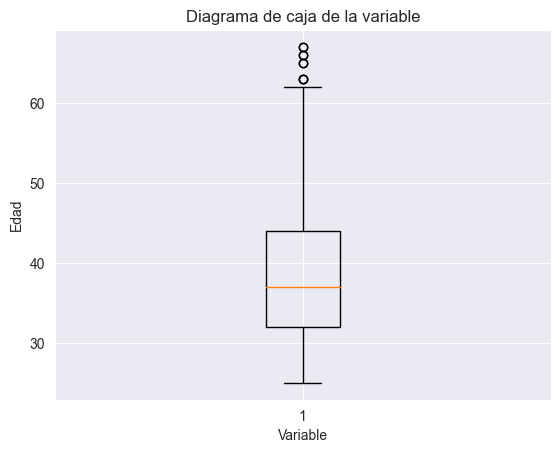

In [127]:
# Crear un diagrama de caja para una variable numérica
plt.boxplot(dataframe['Edad'])
plt.xlabel('Variable')
plt.ylabel('Edad')
plt.title('Diagrama de caja de la variable')
plt.show()

3. Realice análisis de cómo se relacionan las variables continuas con la variable de interés. Acompañe con gráficos y estadísticas. ¿Qué variables pudieran resultar significativas a la hora de modelar la probabilidad de que el trabajador sea desvinculado a la empresa?

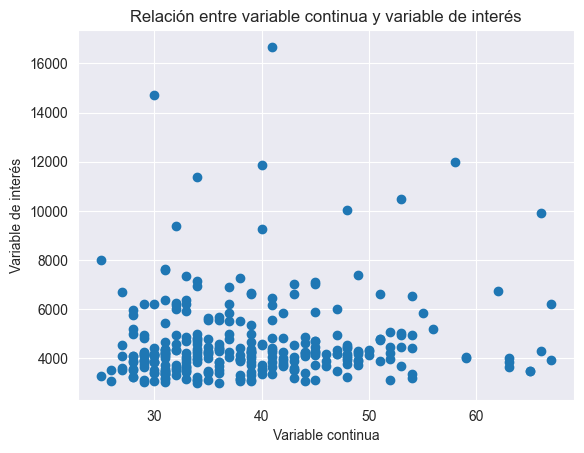

In [128]:
# Gráfico de dispersión entre una variable continua y la variable de interés
plt.scatter(dataframe['Edad'], dataframe['Salario'])
plt.xlabel('Variable continua')
plt.ylabel('Variable de interés')
plt.title('Relación entre variable continua y variable de interés')
plt.show()

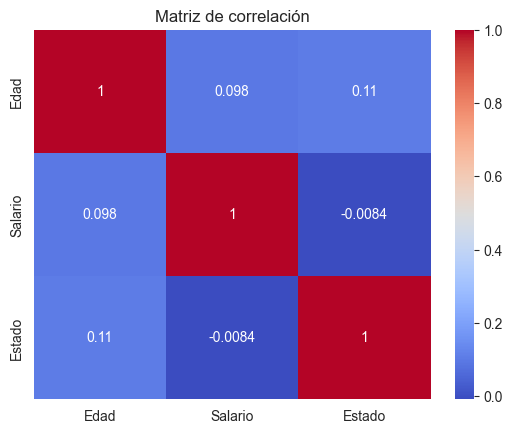

In [129]:
# Calcular la matriz de correlación
correlation_matrix = dataframe[['Edad', 'Salario', 'Estado']].corr()

# Visualizar la matriz de correlación con un mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

In [130]:
# Realizar una prueba t de Student entre la variable continua y la variable de interés
group1 = dataframe[dataframe['Estado'] == 1]['Edad']
group0 = dataframe[dataframe['Estado'] == 0]['Edad']
t_statistic, p_value = ttest_ind(group1, group0)

# Imprimir el resultado de la prueba
print("Estadística de prueba t:", t_statistic)
print("Valor p:", p_value)

Estadística de prueba t: 1.8556566567679702
Valor p: 0.06445763751267412


4. Realice análisis de cómo se relacionan las variables categóricas con la variable de interés. Acompañe con gráficos y estadísticas. ¿Qué variables pudieran resultar significativas a la hora de modelar la probabilidad de que el trabajador sea desvinculado a la empresa?

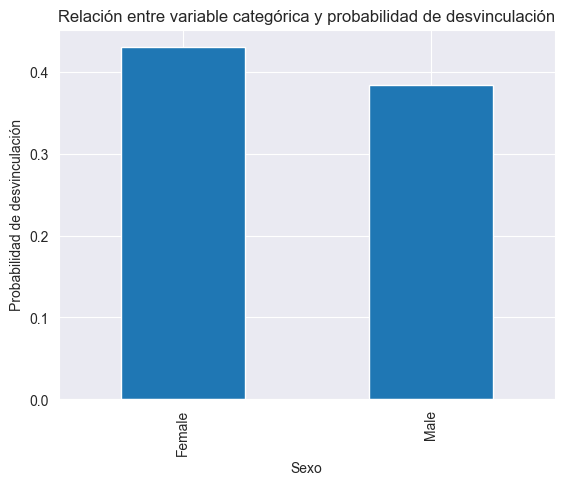

In [131]:
# Gráfico de barras de una variable categórica y la variable de interés
dataframe.groupby('Sexo')['Estado'].mean().plot(kind='bar')
plt.xlabel('Sexo')
plt.ylabel('Probabilidad de desvinculación')
plt.title('Relación entre variable categórica y probabilidad de desvinculación')
plt.show()

In [132]:
# Tabla de contingencia entre una variable categórica y la variable de interés
contingency_table = pd.crosstab(dataframe['Sexo'], dataframe['Estado'])
print(contingency_table)

Estado    0   1
Sexo           
Female  101  76
Male     82  51
